In [31]:

# GRU for international airline passengers problem with regression 
import numpy
import matplotlib.pyplot as plt
import pandas as pd
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import GRU 
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error



In [32]:
# fix random seed for reproducibility
numpy.random.seed(7)

# load the dataset
dataframe = pd.read_csv('sample_data/airline-passengers.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')

# normalize the dataset with Min max scaling
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

96 48


In [33]:
# This function convert an array of values into a dataset matrix
#It takes two arguments: the dataset, which is a NumPy array that we want to convert into a dataset, 
#and the look_back, which is the number of previous time steps to use as input variables to predict the next time period 
# in this case defaulted to 1.

def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)
 
 # reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [35]:
model = Sequential()
#model.add(GRU(4, input_shape=(1, look_back)))
model.add(GRU(4, input_shape=(1, look_back)))
model.add(Dense(1))

In [36]:
#---- Compile and fit the model --------
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=50, batch_size=1, verbose=2)


Epoch 1/50
94/94 - 2s - loss: 0.0523 - 2s/epoch - 18ms/step
Epoch 2/50
94/94 - 0s - loss: 0.0224 - 147ms/epoch - 2ms/step
Epoch 3/50
94/94 - 0s - loss: 0.0197 - 176ms/epoch - 2ms/step
Epoch 4/50
94/94 - 0s - loss: 0.0182 - 178ms/epoch - 2ms/step
Epoch 5/50
94/94 - 0s - loss: 0.0169 - 164ms/epoch - 2ms/step
Epoch 6/50
94/94 - 0s - loss: 0.0159 - 177ms/epoch - 2ms/step
Epoch 7/50
94/94 - 0s - loss: 0.0144 - 157ms/epoch - 2ms/step
Epoch 8/50
94/94 - 0s - loss: 0.0131 - 201ms/epoch - 2ms/step
Epoch 9/50
94/94 - 0s - loss: 0.0122 - 195ms/epoch - 2ms/step
Epoch 10/50
94/94 - 0s - loss: 0.0110 - 193ms/epoch - 2ms/step
Epoch 11/50
94/94 - 0s - loss: 0.0100 - 246ms/epoch - 3ms/step
Epoch 12/50
94/94 - 0s - loss: 0.0091 - 268ms/epoch - 3ms/step
Epoch 13/50
94/94 - 0s - loss: 0.0082 - 226ms/epoch - 2ms/step
Epoch 14/50
94/94 - 0s - loss: 0.0073 - 193ms/epoch - 2ms/step
Epoch 15/50
94/94 - 0s - loss: 0.0063 - 172ms/epoch - 2ms/step
Epoch 16/50
94/94 - 0s - loss: 0.0056 - 211ms/epoch - 2ms/step
Epo

In [37]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))


Train Score: 26.00 RMSE
Test Score: 52.38 RMSE


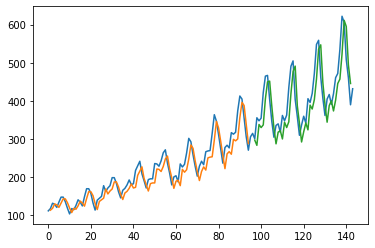

In [38]:
# ------ Visualize the GRU prediction result ------

# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()